In [1]:
import json

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
f = open('/content/gdrive/MyDrive/MUStARD-master/data/sarcasm_data.json')
data = json.load(f)

In [4]:
captions = []
actor = []
show = []
sarcastic_or_not = []
sarc_captions=[]
non_sarc_captions=[]
for key,val in data.items():
  caption = val['utterance']
  captions.append(caption)
  actor.append(val['speaker'])
  show.append(val['show'])

  if val['sarcasm']:
    sarcastic_or_not.append(1)
    cap = val['utterance']
    sarc_captions.append(cap)
  else:
    sarcastic_or_not.append(0)
    cap = val['utterance']
    non_sarc_captions.append(cap)
  

In [5]:
import matplotlib.pyplot as plt
from collections import Counter

In [6]:
label_map = {}
for key,val in data.items():
  label_map[key] = val['sarcasm']

In [ ]:
from textblob import TextBlob
import numpy as np
def plot_polarity(polarity_dict, label):
  keys=polarity_dict.keys()
  values=polarity_dict.values()

  x = [-1.4,-0.4,0.6]
  #plt.bar(keys, values)
  fig, ax = plt.subplots()
  c = ['red', 'yellow', 'black']
  plot = ax.bar(keys, values,color=c)
  width = 0.8
  ax.set_ylim(0,350)
  ax.set_ylabel('Frequency')
  if(label==1):
    ax.set_title('Polarity distribution in sarcastic statements')
  else:
    ax.set_title('Polarity distribution in non sarcastic statements')
  ax.set_xticks(np.add(x,(width/2))) # set the position of the x ticks
  ax.set_xticklabels(('negative','neutral','positive'))

def get_polarity(captions, label):
  
  sentiment_scores=[]
  normalised_sent_scores=[]
  for i in captions:
    score=TextBlob(i).sentiment.polarity
    sentiment_scores.append(score)
    if(score<0):
      normalised_sent_scores.append(-1)
    if(score==0):
      normalised_sent_scores.append(0)
    if(score>0):
      normalised_sent_scores.append(1)
  polarity_dict=dict(Counter(normalised_sent_scores))
  plot_polarity(polarity_dict, label)


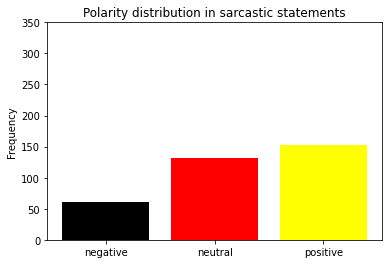

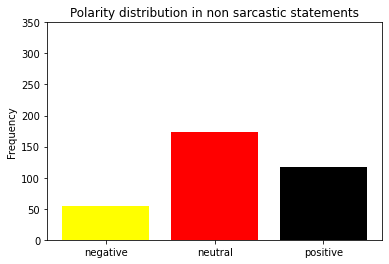

In [ ]:
get_polarity(sarc_captions, 1)
get_polarity(non_sarc_captions, 0)

In [ ]:

actors_map = dict(Counter(actor))

keys = list(actors_map.keys())
val = list(actors_map.values())



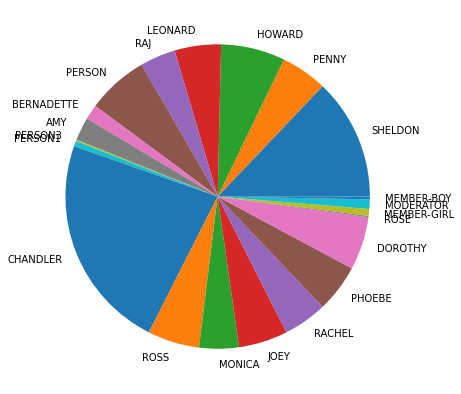

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.pie(val, labels = keys)
 
# show plot
plt.show()

In [ ]:

actors_map

{'SHELDON': 89,
 'PENNY': 34,
 'HOWARD': 47,
 'LEONARD': 34,
 'RAJ': 26,
 'PERSON': 45,
 'BERNADETTE': 11,
 'AMY': 17,
 'PERSON3': 1,
 'PERSON1': 4,
 'CHANDLER': 158,
 'ROSS': 38,
 'MONICA': 29,
 'JOEY': 36,
 'RACHEL': 32,
 'PHOEBE': 35,
 'DOROTHY': 39,
 'ROSE': 1,
 'MEMBER-GIRL': 5,
 'MODERATOR': 7,
 'MEMBER-BOY': 2}

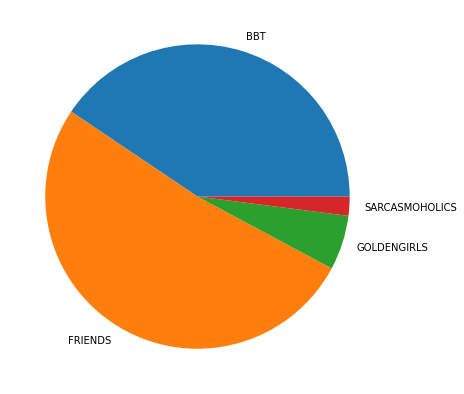

In [ ]:
shows_map = dict(Counter(show))
keys = list(shows_map.keys())
val = list(shows_map.values())


fig = plt.figure(figsize =(10, 7))
plt.pie(val, labels = keys)
 
# show plot
plt.show()


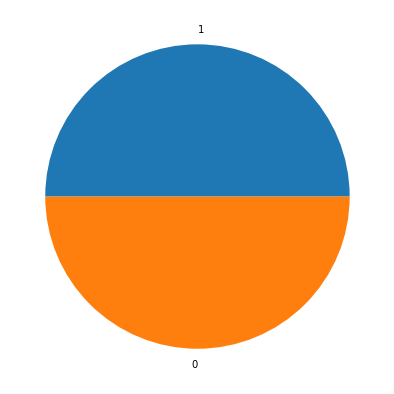

In [ ]:
labels_map = dict(Counter(sarcastic_or_not))
keys = list(labels_map.keys())
val = list(labels_map.values())


fig = plt.figure(figsize =(10, 7))
plt.pie(val, labels = keys)
 
# show plot
plt.show()


In [7]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
from nltk.tokenize import word_tokenize
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [10]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [11]:
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

In [30]:
token_list = []

for caption in captions:
  tagged_sentence = nltk.tag.pos_tag(caption.split())
  proper_noun_removed = [word for word,tag in tagged_sentence if tag != 'NNP' and tag != 'NNPS']
  edited_sentence=' '.join(proper_noun_removed)
  #remove punctuations
  cleaned_sent = edited_sentence.translate(str.maketrans('', '', string.punctuation))
  #split into words
  words_list = word_tokenize(cleaned_sent)
  #remove stop words
  filtered_list = []
  for word in words_list:
    word = word.lower()
    if word not in stop_words and (word.isalpha()):
      #stemming
      stemmed_word = ps.stem(word)
      #lemmatization
      lemmatized_word= lemmatizer.lemmatize(word)
      #removing very small words
      filtered_list.append(lemmatized_word)
  token_list.append(filtered_list)

In [ ]:
import pandas as pd
from wordcloud import WordCloud

In [ ]:
sarcastic_word_list = []
non_sarcastic_word_list = []
 

In [ ]:
for i in range(len(token_list)):
  if sarcastic_or_not[i] == 0:
    non_sarcastic_word_list.extend(token_list[i])
  else:
    sarcastic_word_list.extend(token_list[i])


In [ ]:
from collections import Counter

In [ ]:
sarcasm_dict= dict(Counter(sarcastic_word_list))
non_sarc_dict = dict(Counter(non_sarcastic_word_list))

In [ ]:
sarcastic_set = set(sarcastic_word_list)
non_sarc_set = set(non_sarcastic_word_list)


In [ ]:
print(sarcasm_dict)

{'privilege': 1, 'thinking': 2, 'inferring': 1, 'evidence': 1, 'suggests': 1, 'coffee': 3, 'garage': 1, 'compiling': 1, 'double': 1, 'suicide': 1, 'scratching': 1, 'crescentshaped': 1, 'pattern': 1, 'conceal': 1, 'nicely': 1, 'pleased': 1, 'fortunate': 1, 'university': 1, 'chosen': 1, 'despite': 2, 'original': 1, 'research': 3, 'instead': 3, 'written': 1, 'series': 2, 'popular': 1, 'reduce': 1, 'concept': 1, 'science': 4, 'anecdote': 1, 'dumbed': 1, 'accommodate': 1, 'duration': 1, 'average': 1, 'movement': 1, 'parent': 2, 'naming': 1, 'putting': 1, 'getting': 2, 'beaten': 1, 'enough': 4, 'foreigner': 1, 'billion': 1, 'wallet': 1, 'always': 5, 'possibility': 1, 'spontaneously': 1, 'formed': 1, 'around': 6, 'letter': 1, 'suggest': 2, 'someone': 6, 'latest': 1, 'quarterly': 1, 'tongue': 1, 'swollen': 1, 'brisket': 1, 'comfort': 1, 'moment': 3, 'notify': 1, 'editor': 1, 'plenty': 1, 'redefined': 1, 'please': 3, 'contribution': 1, 'resumed': 1, 'sending': 1, 'assistant': 1, 'cutter': 1, 'p

In [ ]:
len(sarcastic_set.intersection(non_sarc_set))

107

In [ ]:
len(sarcastic_set)+len(non_sarc_set)

961

In [ ]:
sarc=list(sarcastic_set.difference(non_sarc_set))
non_sarc=list(non_sarc_set.difference(sarcastic_set))

In [ ]:
def get_wc(text):
  wordcloud = WordCloud(width = 800, height = 800,
                  min_font_size = 10).generate(text)
  
  # plot the WordCloud image                      
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis("off")
  plt.tight_layout(pad = 0) 
  plt.show()

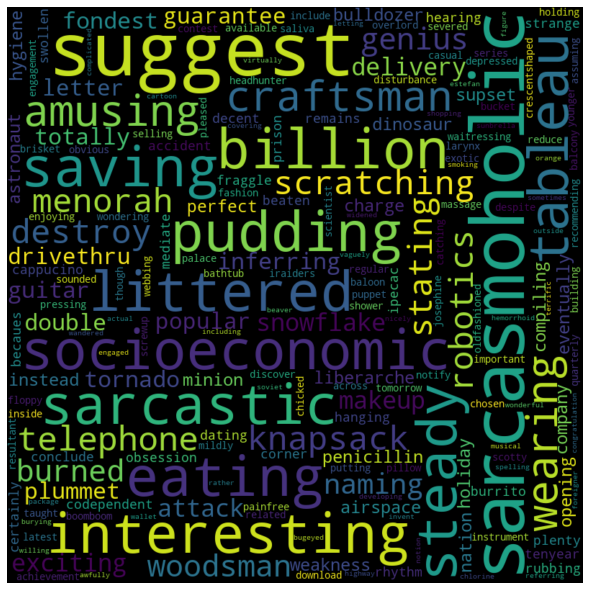

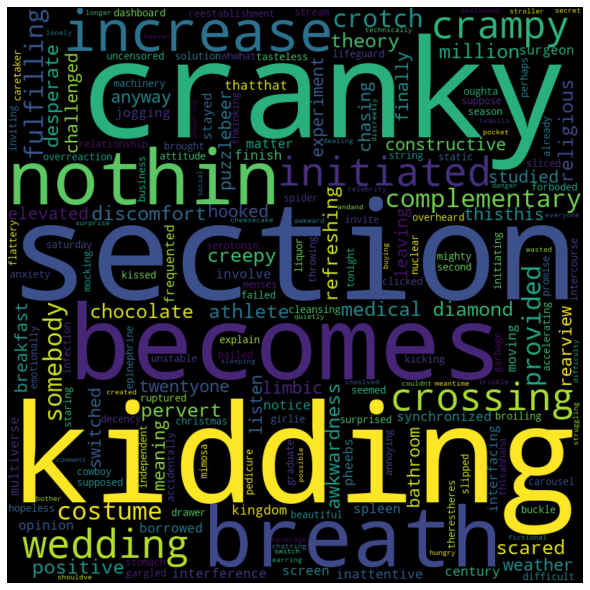

In [ ]:
sarc_text = " ".join(sarc)
non_sarc_text= " ".join(non_sarc)
get_wc(sarc_text)
get_wc(non_sarc_text)

Dimensionality Reduction

In [ ]:
import pickle
text_feats = []
y=[]
label_map_file = open('/content/gdrive/MyDrive/Pickle_Data/label_map.pkl', 'rb')
label_map = pickle.load(label_map_file)
with (open("/content/gdrive/MyDrive/Pickle_Data/text_bert_embeddings.pkl", "rb")) as openfile:
    while True:
        try:
            text_feats.append(pickle.load(openfile))
        except EOFError:
            break
text_feats = np.array(text_feats)
text_feats = text_feats[0]
print("text features -> ", text_feats.shape)

text features ->  (690, 768)


In [ ]:
y=np.array(sarcastic_or_not)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
x = sc.fit_transform(text_feats)

323


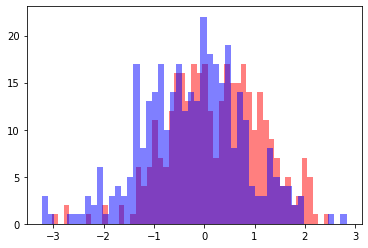

644


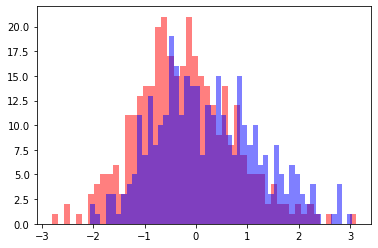

115


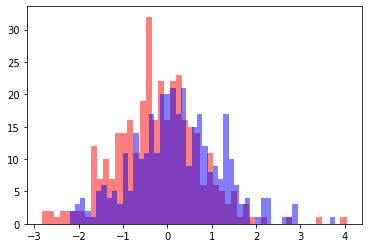

482


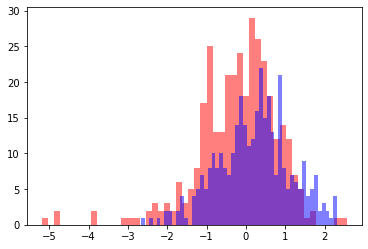

621


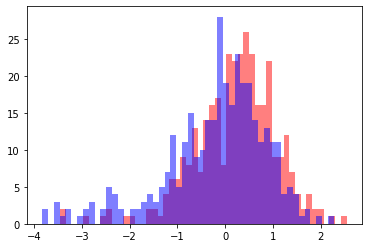

499


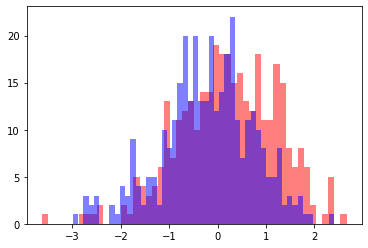

85


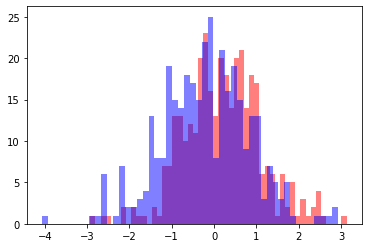

42


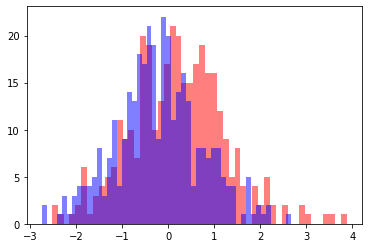

8


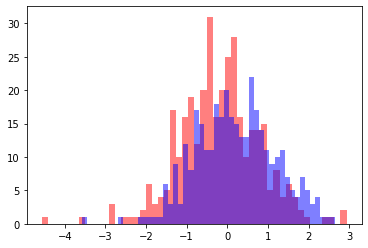

766


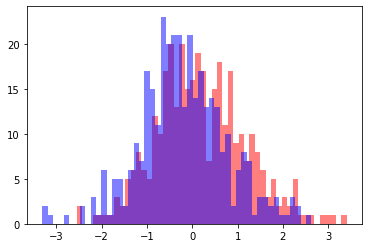

232


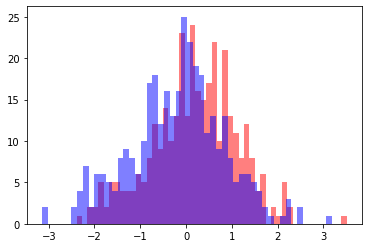

347


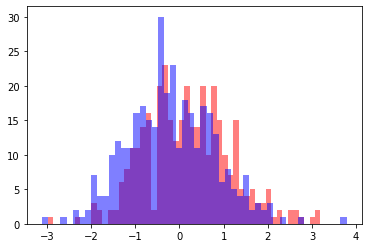

211


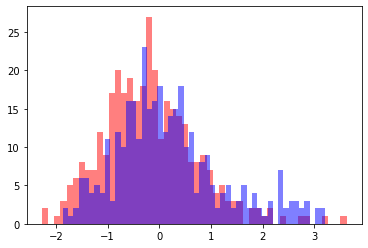

547


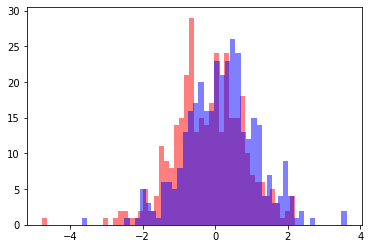

35


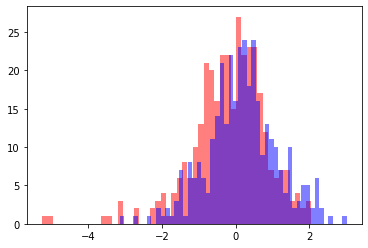

227


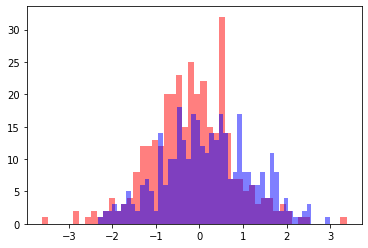

360


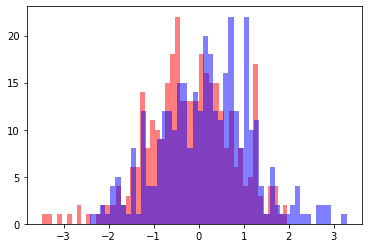

662


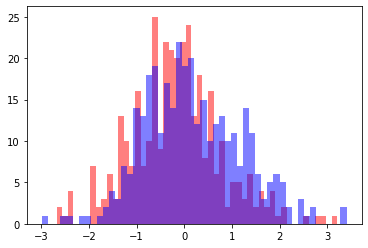

705


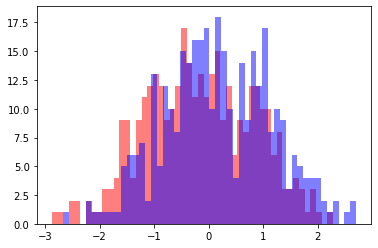

467


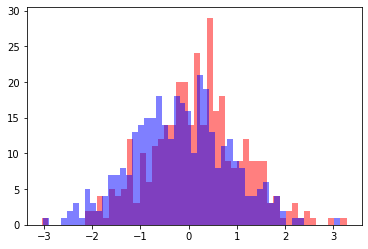

389


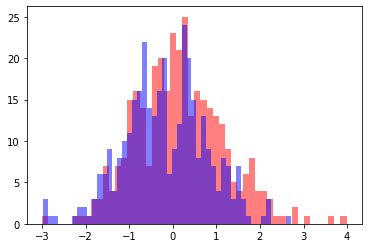

269


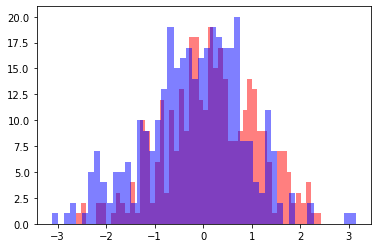

14


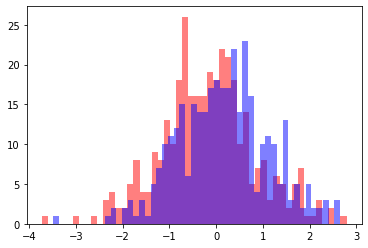

457


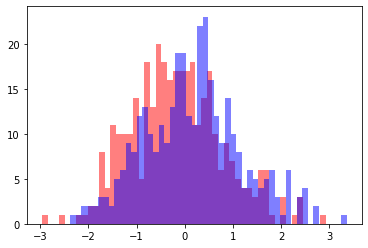

37


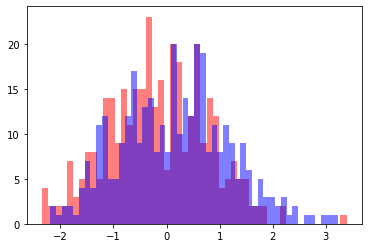

381


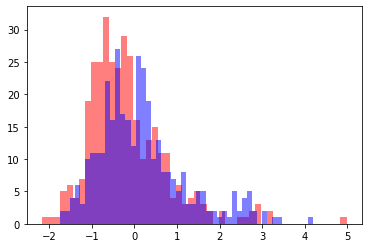

206


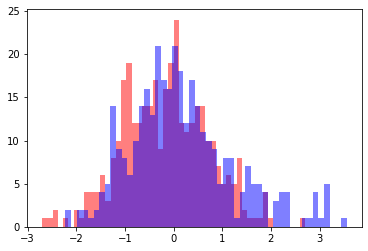

749


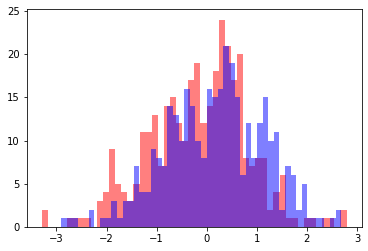

5


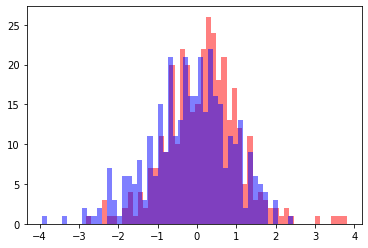

748


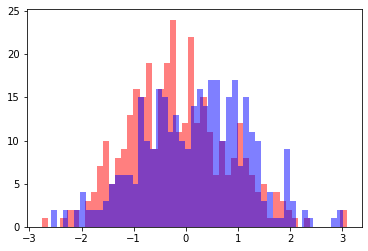

459


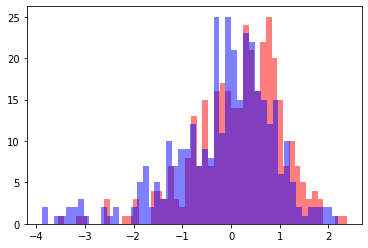

167


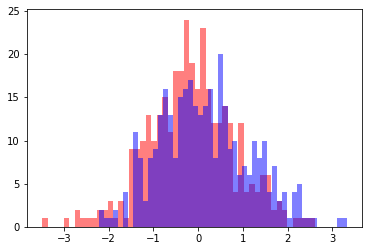

577


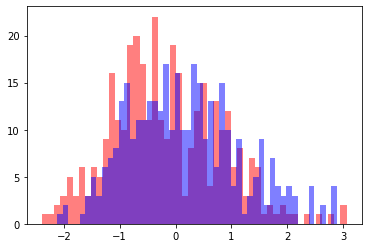

510


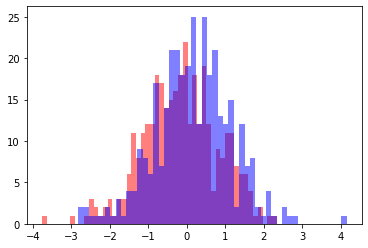

91


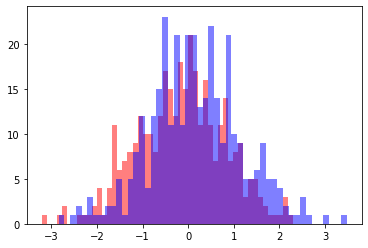

158


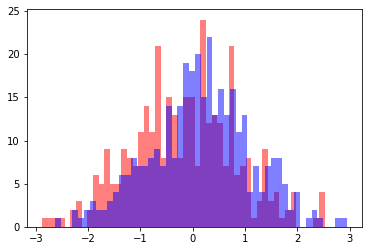

601


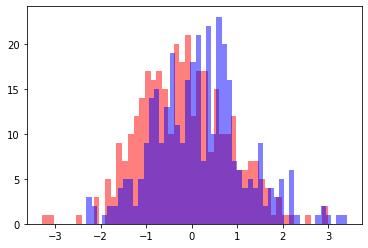

112


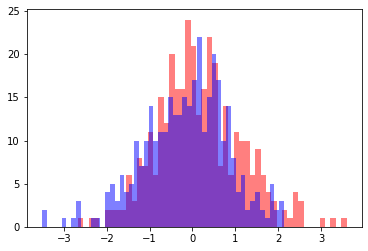

361


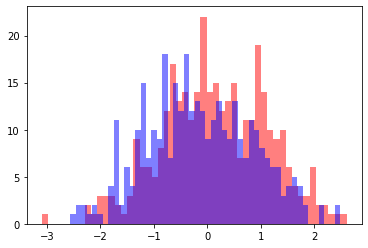

324


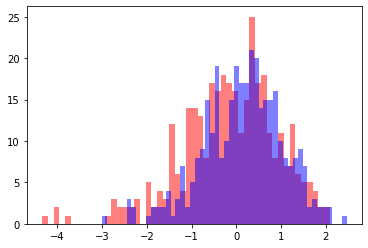

282


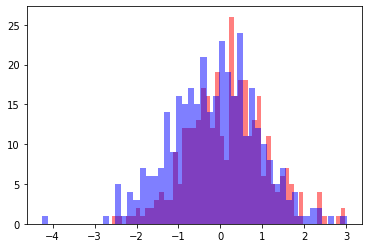

606


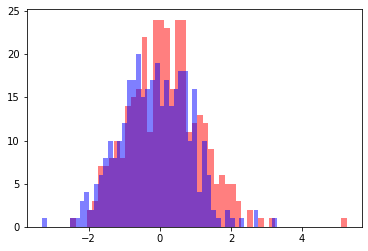

539


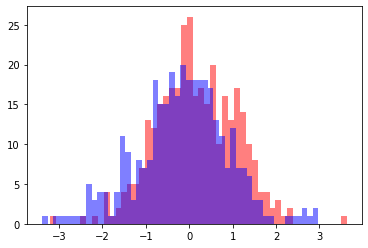

528


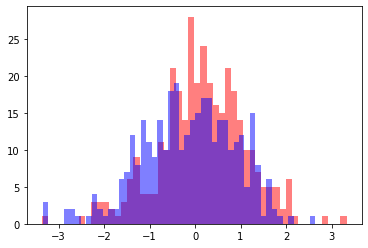

30


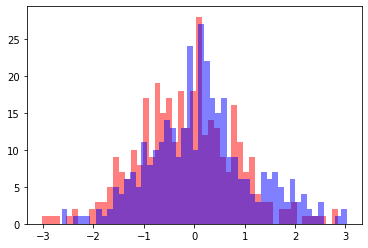

41


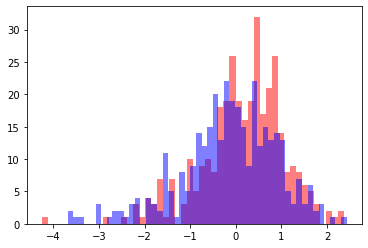

104


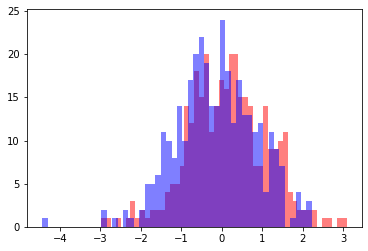

392


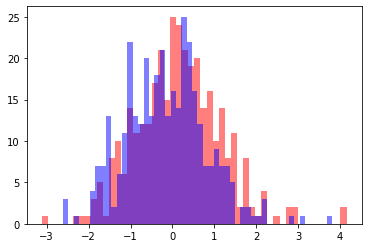

722


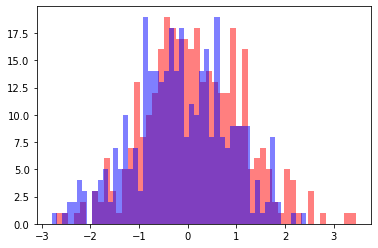

568


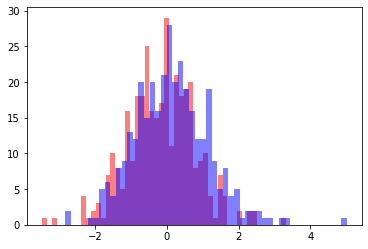

1


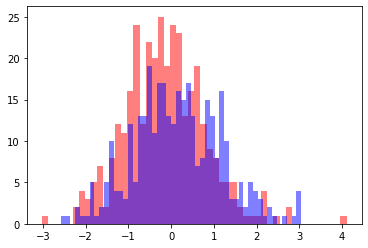

26


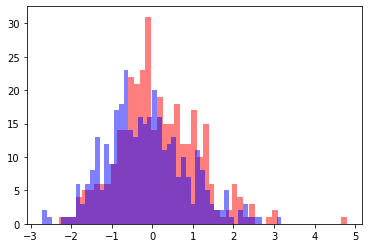

474


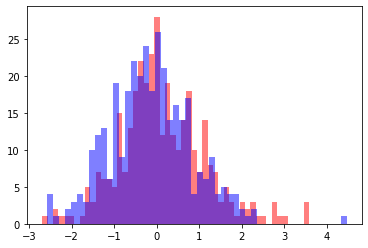

67


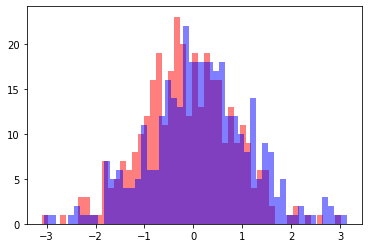

598


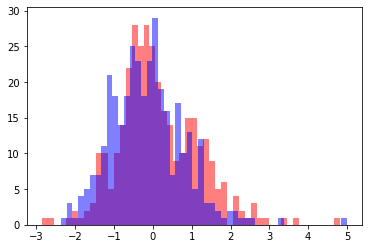

114


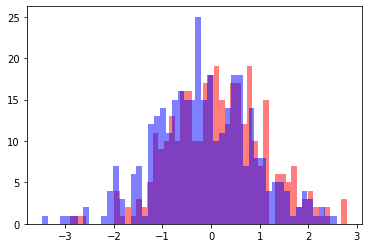

320


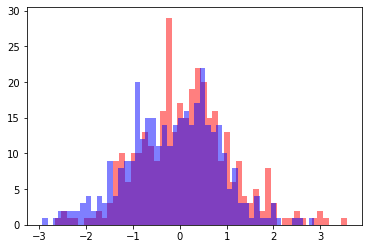

32


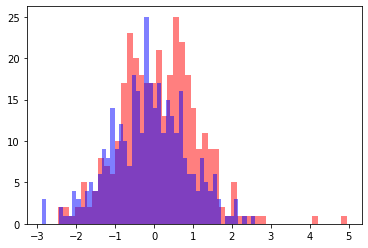

517


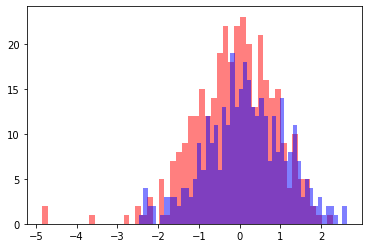

706


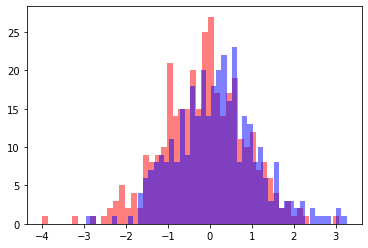

366


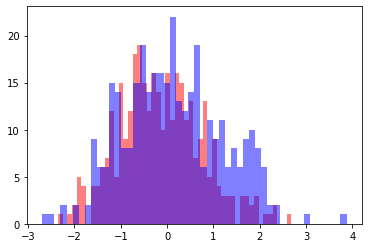

92


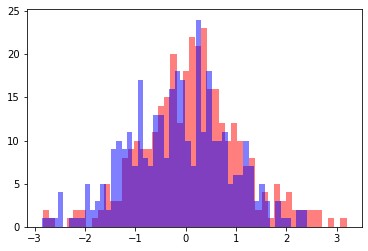

672


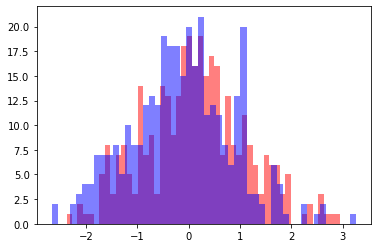

210


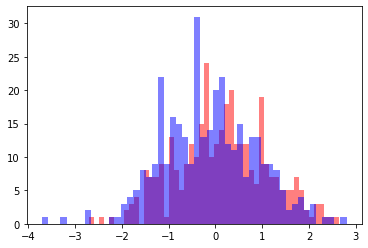

698


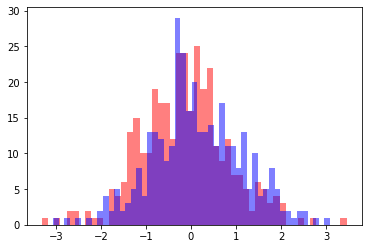

572


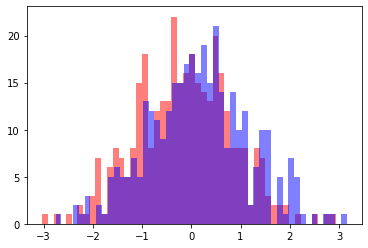

33


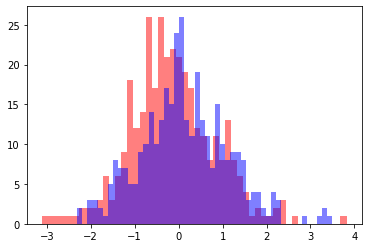

537


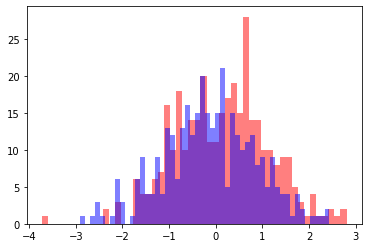

219


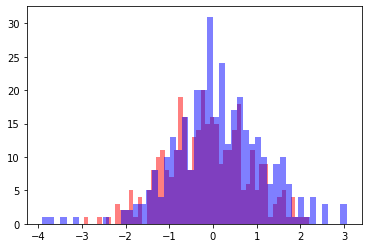

590


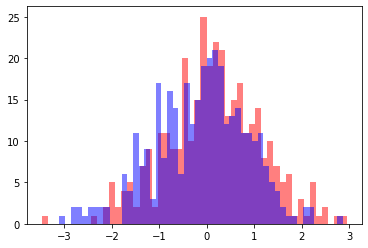

27


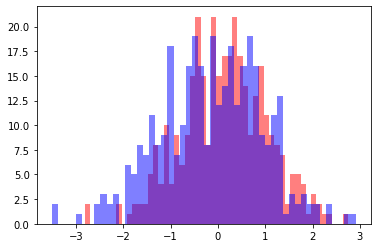

276


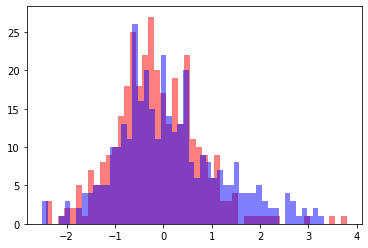

723


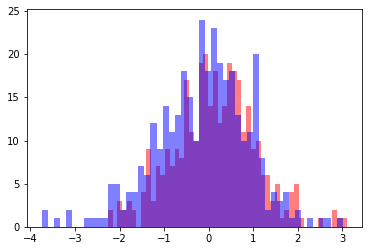

58


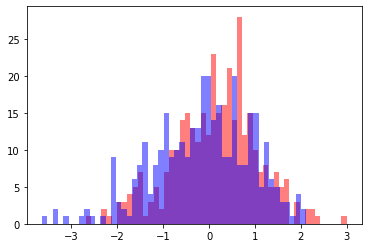

596


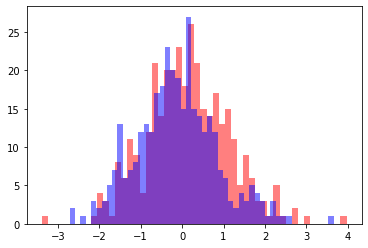

721


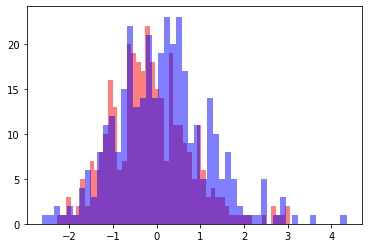

221


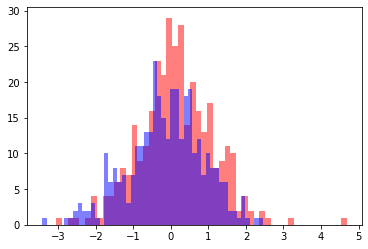

580


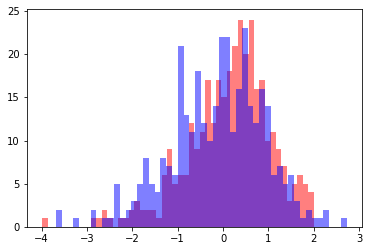

724


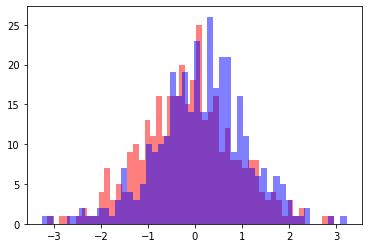

354


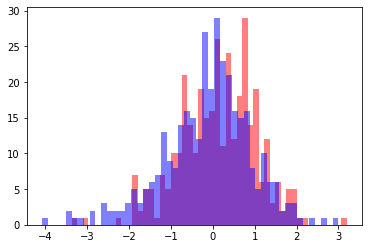

294


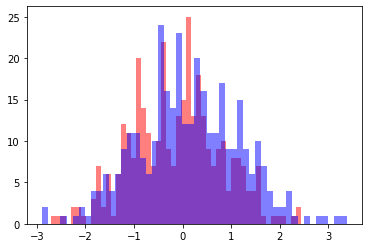

761


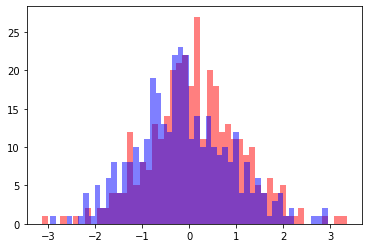

726


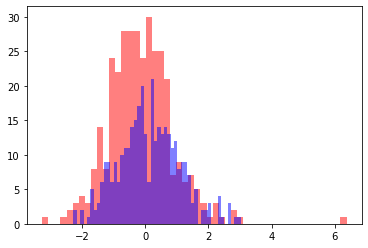

186


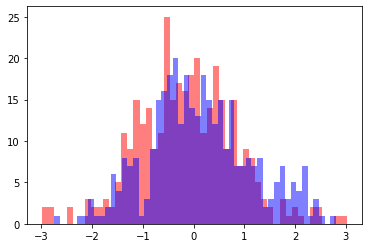

409


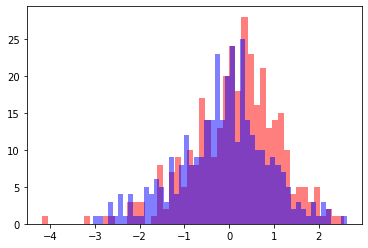

718


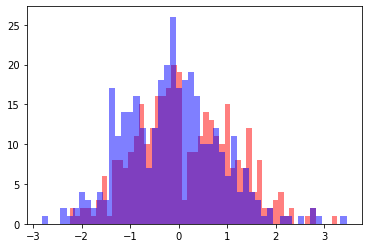

478


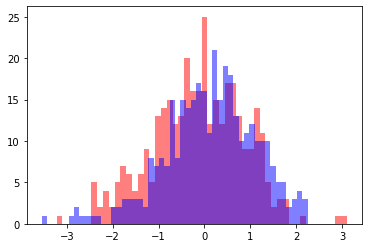

346


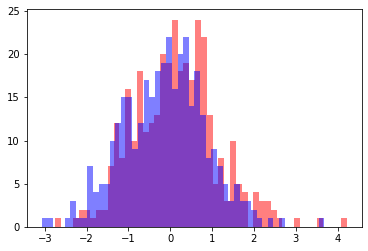

349


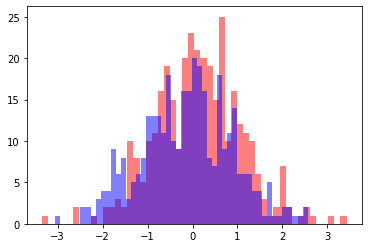

83


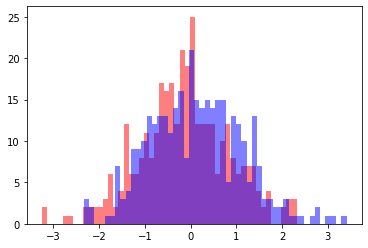

198


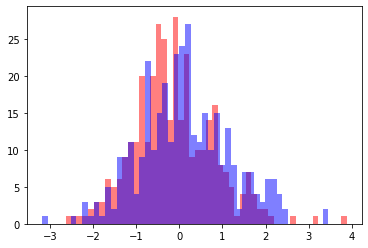

259


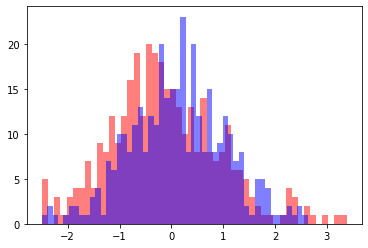

424


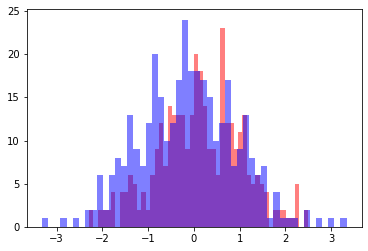

686


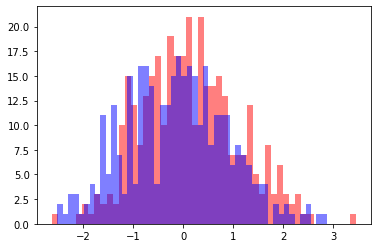

133


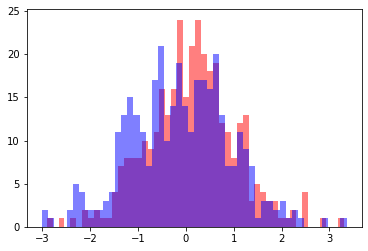

402


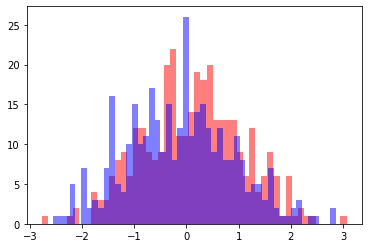

643


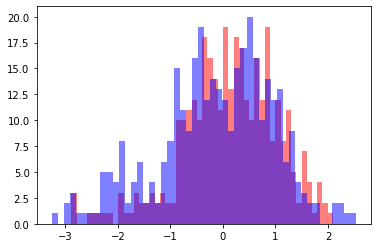

739


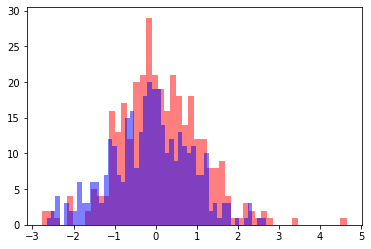

689


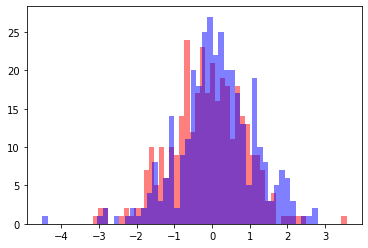

160


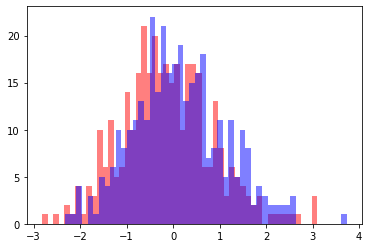

In [ ]:
y_sarcasm = [i for i in range(len(y)) if y[i]==True]
y_not_sarcasm = [i for i in range(len(y)) if y[i]==False]
top_difference = []
for i in range(np.shape(x)[1]):
  f1_sarcasm = x[y_sarcasm, i]
  f1_not_sarcasm = x[y_not_sarcasm, i]
  top_difference.append((abs(np.mean(f1_sarcasm) - np.mean(f1_not_sarcasm))))
max_change = np.argsort(top_difference)[::-1][0:100]
np.array(top_difference)[max_change]
for i in max_change:
  print(i)
  plt.hist(x[y_sarcasm, i], bins=50, alpha=0.5, color='r')
  plt.hist(x[y_not_sarcasm, i], bins=50, alpha=0.5, color='b')
  plt.show()

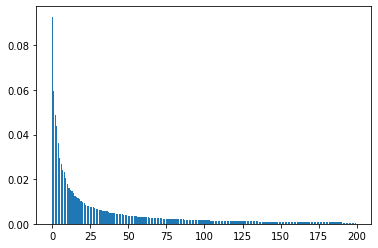

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
x_new=pca.fit_transform(x)
top_pca = pca.explained_variance_ratio_

plt.bar(np.arange(len(top_pca)), top_pca)
plt.show()

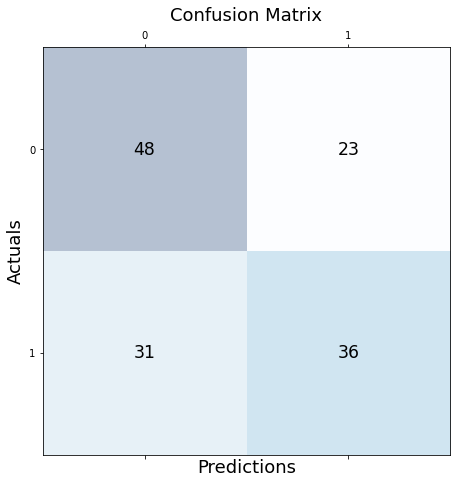

In [ ]:
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression  
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 0)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)
from sklearn.metrics import classification_report, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
def modelling(choice):
  if(choice==0):
    clf = GaussianNB()
  if(choice==1):
    clf = SVC()
  if(choice==2):
    clf = RandomForestClassifier()
  if(choice==3):
    clf = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=1, random_state=0)
  kf = KFold(n_splits = 5, shuffle = True, random_state = 1)

  score = []
  for k in range(1,len(max_change)):
    temp_score = []
    for train_index, test_index in kf.split(x):
      X_train, y_train = x[train_index], y[train_index]
      X_test, y_test = x[test_index], y[test_index]
      y_pred = clf.fit(X_train[:,max_change[0:k]], y_train).predict(X_test[:,max_change[0:k]])
      temp_score.append(f1_score(y_test, y_pred))
    # print(classification_report(y_test, y_pred, digits=5))
    score.append(np.mean(np.array(temp_score)))
  plt.plot(np.arange(0,len(score)), score)
  plt.show() 

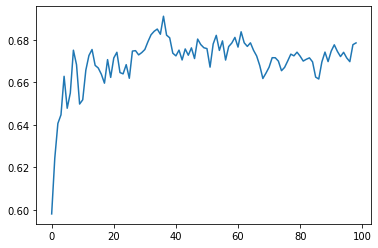

In [ ]:
modelling(0)

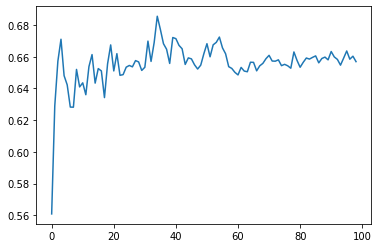

In [ ]:
modelling(1)

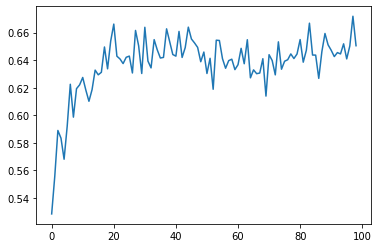

In [ ]:
modelling(2)

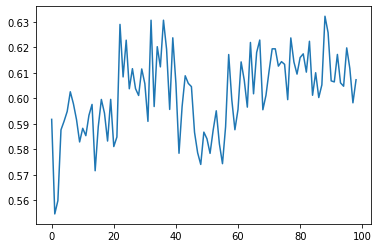

In [ ]:
modelling(3)

# Tokenizer

In [31]:
len_dict = {}
for caption in token_list:
  caption_len = len(caption)
  len_dict[caption_len] = len_dict.get(caption_len, 0)+1
len_dict

{4: 104,
 5: 91,
 25: 1,
 9: 29,
 3: 76,
 6: 78,
 31: 1,
 14: 6,
 13: 5,
 10: 23,
 7: 50,
 11: 18,
 8: 37,
 12: 9,
 17: 6,
 15: 5,
 16: 2,
 21: 1,
 2: 60,
 18: 2,
 19: 1,
 1: 60,
 0: 25}

In [21]:
# construct word map
words = [word for token in token_list for word in token]

In [23]:
word_set = list(set(words))

In [ ]:
word_set

In [26]:
word_map = {k:v+1 for v, k in enumerate(word_set)}

In [28]:
word_map['<UNK>'] = len(word_map)+1
word_map['<pad>'] = 0
word_map['<START>'] = len(word_map)+1
word_map['<END>'] = len(word_map)+1

In [48]:
INPUT_LEN=10
from torchnlp.encoders.text import StaticTokenizerEncoder， stack_and_pad_tensors, pad_tensor
encoder = StaticTokenizerEncoder(loaded_data, tokenize=lambda s: s.split())
encoded_data = [encoder.encode(example) for example in loaded_data]


ValueError: ignored